Installing and importing all possible needed libraries.

In [ ]:
pip install scikit-learn seaborn matplotlib xgboost catboost lightgbm imbalanced-learn feature-engine yellowbrick


In [ ]:
# Basic utilities
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import gc
import joblib
import re
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import numpy as np
import re


# Scikit-learn model selection, preprocessing, and metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    PrecisionRecallDisplay, RocCurveDisplay
)
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (
    SelectKBest, SelectPercentile, SelectFromModel, chi2, RFE, SequentialFeatureSelector
)

# Scikit-learn classifiers
from sklearn.linear_model import (
    LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier
)
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier,
    GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier,
    VotingClassifier, StackingClassifier
)
from sklearn.neural_network import MLPClassifier

# Other ML libraries
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import BorderlineSMOTE

# Feature Engineering tools
from feature_engine.outliers import Winsorizer
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures

# Yellowbrick visualizers
from yellowbrick.classifier import ClassPredictionError

# Settings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


In [ ]:
!pip install catboost
!pip install feature-engine


Importing Data File (done in this case via Google Drive)

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Correct file path
file_path = '/content/drive/MyDrive/Data Analytics project/DATA ANALYTICS PROJECT.xlsx'
# Reading the Excel file into a pandas DataFrame
data = pd.read_excel(file_path)




Checking Imported data + Data Overview

In [ ]:
df=data.copy()
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
def check_df(dataframe):
    print(f"Shape: {dataframe.shape}")
    print("Types:\n", dataframe.dtypes)
    print("Missing Values:\n", dataframe.isnull().sum())

check_df(df)


Shape: (3380, 96)
Types:
 Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object
Missing Values:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                    

Data cleaning

In [ ]:
# Drop columns where all values are the same (only one unique value)
df = df.drop([col for col in df.columns if df[col].nunique() == 1], axis=1)
# Replace periods in column names with nothing (if this is your intention)
df.columns = df.columns.str.replace('.', '', regex=True)

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Simplified function to grab column names based on data types and unique value counts.

    :param dataframe: DataFrame to analyze
    :param cat_th: Threshold for numeric but categorical variable
    :param car_th: Threshold for categorical but cardinal variable
    :return: Lists of categorical, numerical, categorical but cardinal, and numeric but categorical columns
    """

    cat_cols = [col for col in dataframe.select_dtypes(include='object').columns]
    num_cols = [col for col in dataframe.select_dtypes(exclude='object').columns]

    num_but_cat = [col for col in num_cols if dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in cat_cols if dataframe[col].nunique() > car_th]

    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, cat_but_car, num_cols

# Using the function on the dataframe
cat_cols, cat_but_car, num_cols = grab_col_names(df)


Observations: 3380
Variables: 95
cat_cols: 0
num_cols: 93
cat_but_car: 0
num_but_cat: 2


Taking care of outliers in the data (identifying variables containing NO outliers)

In [ ]:
def outlier_thresholds(dataframe, variable, low_quantile=0.15, up_quantile=0.85):
    """
    Calculate lower and upper threshold for outliers in a given column.

    Args:
    dataframe: pandas DataFrame
    variable: column in the DataFrame to calculate thresholds for
    low_quantile: lower quantile, default is 0.15
    up_quantile: upper quantile, default is 0.85

    Returns:
    low_limit, up_limit: lower and upper thresholds for outliers
    """
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    """
    Check if there are any outliers in a column of the DataFrame.

    Args:
    dataframe: pandas DataFrame
    col_name: column in the DataFrame to check for outliers

    Returns:
    True if there are outliers, False otherwise
    """
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# Assuming num_cols is a list of numerical column names in df
for col in num_cols:
    print(col, check_outlier(df, col))



 ROA(C) before interest and depreciation before interest True
 ROA(A) before interest and % after tax True
 ROA(B) before interest and depreciation after tax True
 Operating Gross Margin True
 Realized Sales Gross Margin True
 Operating Profit Rate True
 Pre-tax net Interest Rate True
 After-tax net Interest Rate True
 Non-industry income and expenditure/revenue True
 Continuous interest rate (after tax) True
 Operating Expense Rate False
 Research and development expense rate False
 Cash flow rate True
 Interest-bearing debt interest rate True
 Tax rate (A) True
 Net Value Per Share (B) True
 Net Value Per Share (A) True
 Net Value Per Share (C) True
 Persistent EPS in the Last Four Seasons True
 Cash Flow Per Share True
 Revenue Per Share (Yuan Â¥) True
 Operating Profit Per Share (Yuan Â¥) True
 Per Share Net profit before tax (Yuan Â¥) True
 Realized Sales Gross Profit Growth Rate True
 Operating Profit Growth Rate True
 After-tax Net Profit Growth Rate True
 Regular Net Profit Gro

Replacing the above mentioned variables with threshold values. (Feature reduction)

In [ ]:
def replace_with_thresholds(dataframe, variable):
    """
    Replace outliers in the DataFrame with threshold values.

    Args:
    dataframe: pandas DataFrame
    variable: column in the DataFrame where outliers will be replaced

    This function modifies the dataframe in place.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    # Replace values below the low_limit with the low_limit
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    # Replace values above the up_limit with the up_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# Assuming num_cols is a list of numerical column names in df
for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df, col)


In [ ]:
X = df.drop('Bankrupt?',axis=1)
y = df['Bankrupt?']

Reducing Data

In [ ]:
pipeline = Pipeline(steps=[
    ('constant',DropConstantFeatures()),
    ('correlated',DropCorrelatedFeatures()),
    ('duplicate',DropDuplicateFeatures())
])

X = pipeline.fit_transform(X)
X.shape

(3380, 56)

Balancing the dataset using BorderlineSMOTE

In [ ]:
smote = BorderlineSMOTE()
X, y = smote.fit_resample(X, y)
print("Final dimensions of target label classes:", Counter(y))

Final dimensions of target label classes: Counter({1: 3270, 0: 3270})


Creating test data and training the test data

In [ ]:
from sklearn.preprocessing import RobustScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
#scaling variables
scaler = StandardScaler()
#scaler= RobustScaler()
scaled_train_X = scaler.fit_transform(X_train)

Using Principal Component Analysis (PCA) for further Feature reduction

In [ ]:
from sklearn.decomposition import PCA


pca=PCA()
pca.fit(scaled_train_X)
exp_variance = pca.explained_variance_ratio_
cum_exp_variance = np.cumsum(exp_variance)
print(cum_exp_variance)
pca = PCA(n_components=27,random_state=7)

train_pca = pca.fit_transform(scaled_train_X)

scaled_test_X = scaler.transform(X_test)
test_pca = pca.transform(scaled_test_X)

[0.19856917 0.3091744  0.39025977 0.44087455 0.47966198 0.51683526
 0.5465492  0.57598502 0.60255081 0.62692145 0.64869973 0.66951192
 0.68872481 0.70761895 0.72608293 0.7430661  0.75942536 0.77498753
 0.78985938 0.8044944  0.8181493  0.83141154 0.84383936 0.85474168
 0.86539851 0.87578403 0.88556308 0.89509138 0.9035191  0.91139721
 0.91910993 0.9261018  0.9326384  0.93881132 0.94464233 0.94985741
 0.95483235 0.9596958  0.96384475 0.96779493 0.97152475 0.97508722
 0.97839736 0.98160499 0.98417961 0.98669177 0.98906693 0.99118566
 0.9931141  0.99478774 0.99631288 0.9977008  0.99865724 0.99947564
 0.99998835 1.        ]


Model training, Evaluation and Assessment of multiple models

In [ ]:
def train_and_evaluate_model(model, model_name):
    """
    Train a model and evaluate its performance with additional visuals.

    Args:
    model: The machine learning model to be trained and evaluated.
    model_name: A string representing the model's name.
    """

    # Train the model
    model.fit(train_pca, y_train)

    # Predict on test data
    y_pred = model.predict(test_pca)

    # Print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 50)

    # Calculate and store various performance metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_pred, average='macro')

    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    models.append(model_name)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(test_pca)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (area = {auc(fpr, tpr):.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()



All Models

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       654
           1       0.89      0.92      0.91       654

    accuracy                           0.91      1308
   macro avg       0.91      0.91      0.91      1308
weighted avg       0.91      0.91      0.91      1308

--------------------------------------------------


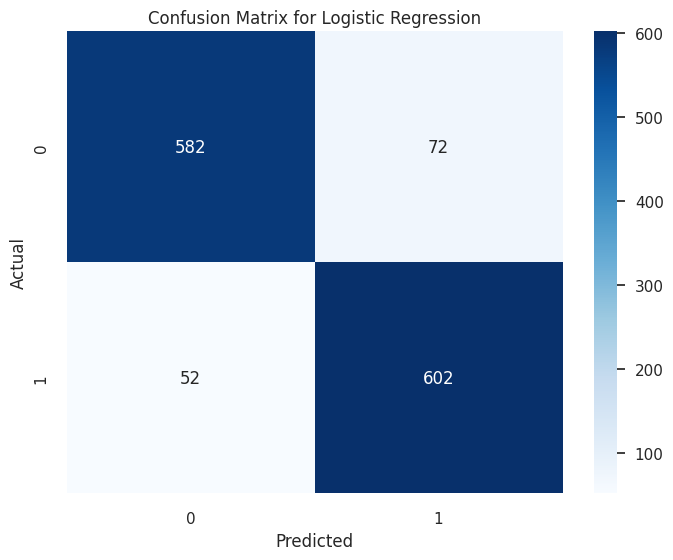

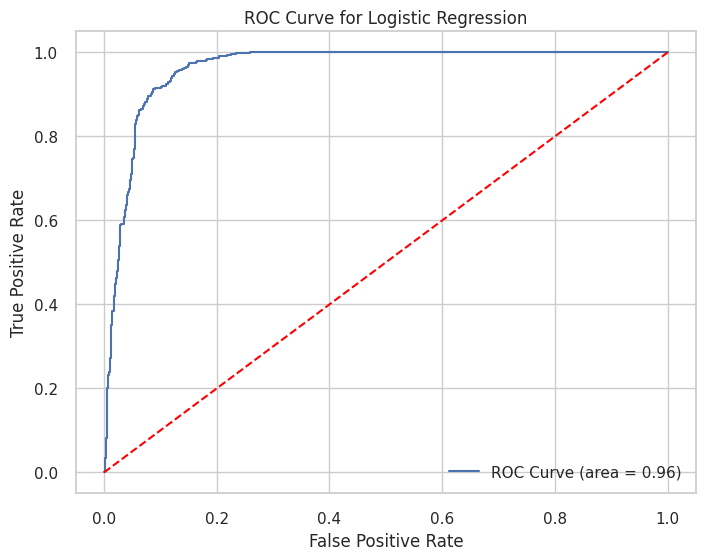

In [ ]:
train_and_evaluate_model(LogisticRegression(), "Logistic Regression")


Classification Report for K-Neighbors Classifier:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       654
           1       0.92      1.00      0.96       654

    accuracy                           0.96      1308
   macro avg       0.96      0.96      0.96      1308
weighted avg       0.96      0.96      0.96      1308

--------------------------------------------------


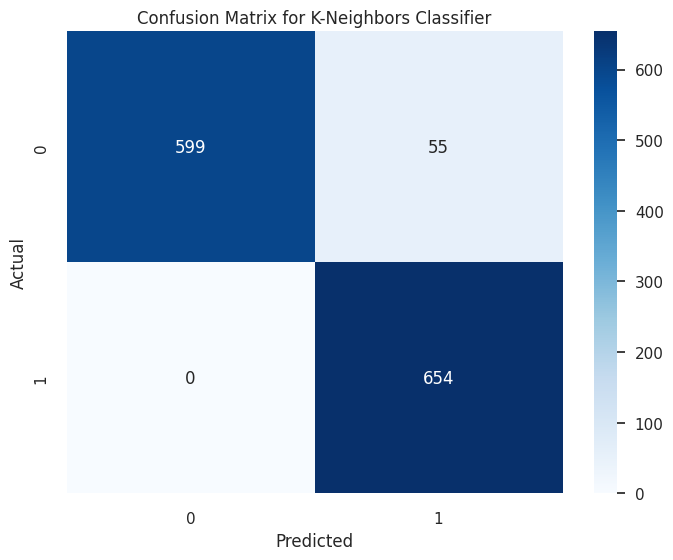

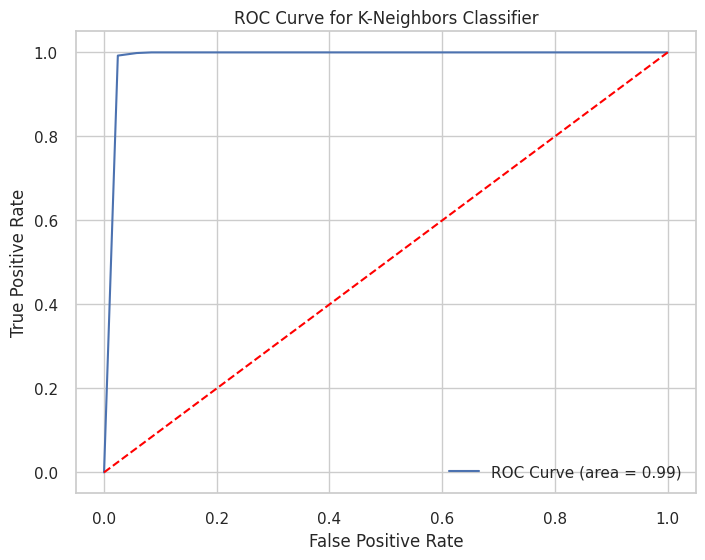

In [ ]:
train_and_evaluate_model(KNeighborsClassifier(), "K-Neighbors Classifier")

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       654
           1       0.99      1.00      0.99       654

    accuracy                           0.99      1308
   macro avg       0.99      0.99      0.99      1308
weighted avg       0.99      0.99      0.99      1308

--------------------------------------------------


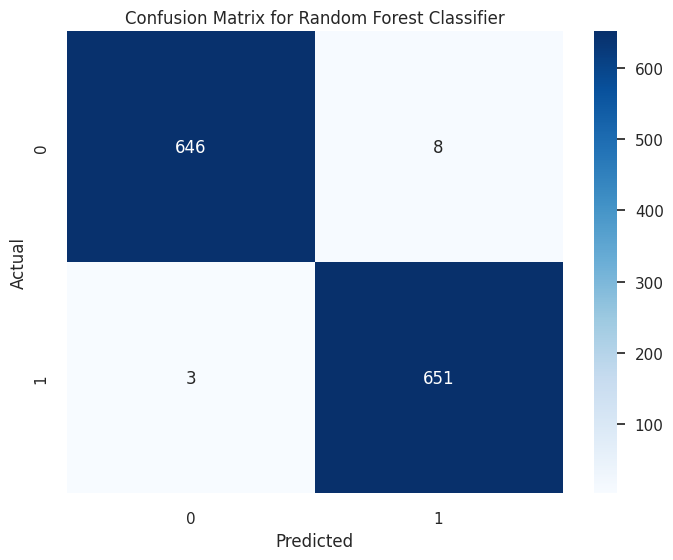

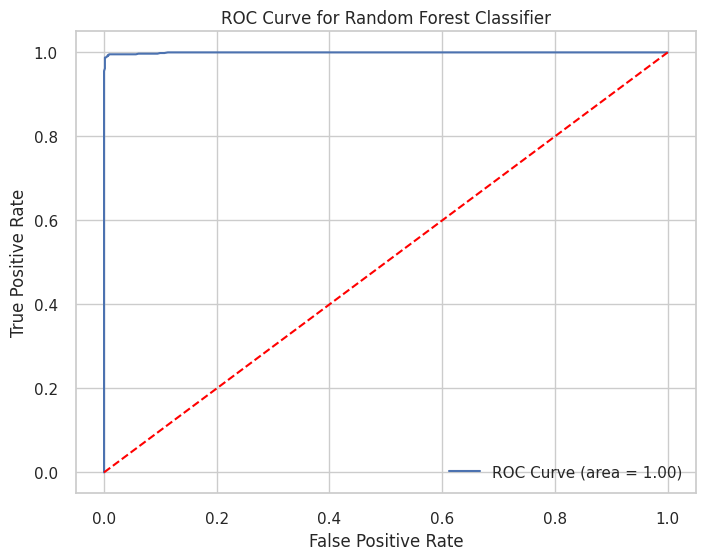

In [ ]:
train_and_evaluate_model(RandomForestClassifier(), "Random Forest Classifier")

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       654
           1       0.97      1.00      0.98       654

    accuracy                           0.98      1308
   macro avg       0.98      0.98      0.98      1308
weighted avg       0.98      0.98      0.98      1308

--------------------------------------------------


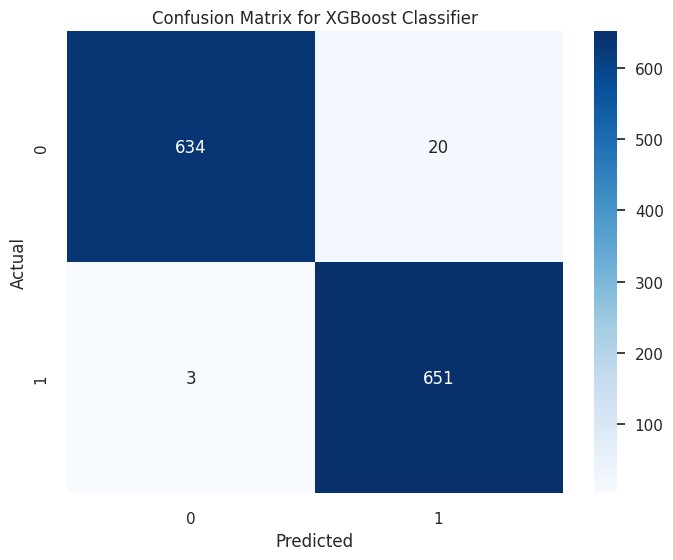

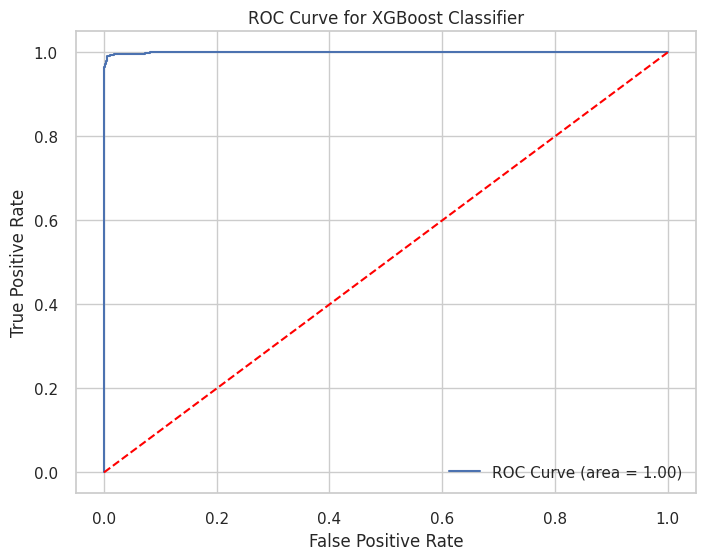

In [ ]:
train_and_evaluate_model(XGBClassifier(), "XGBoost Classifier")

[LightGBM] [Info] Number of positive: 2616, number of negative: 2616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 5232, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report for LGBM Classifier:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       654
           1       0.97      1.00      0.98       654

    accuracy                           0.98      1308
   macro avg       0.98      0.98      0.98      1308
weighted avg       0.98      0.98      0.98      1308

--------------------------------------------------


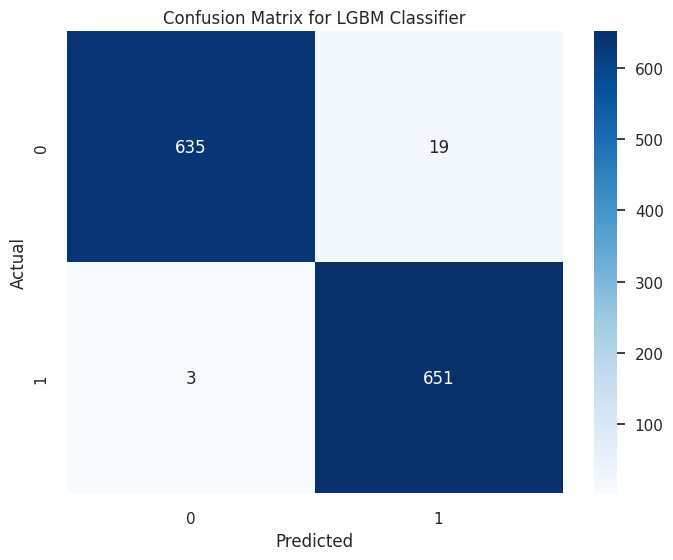

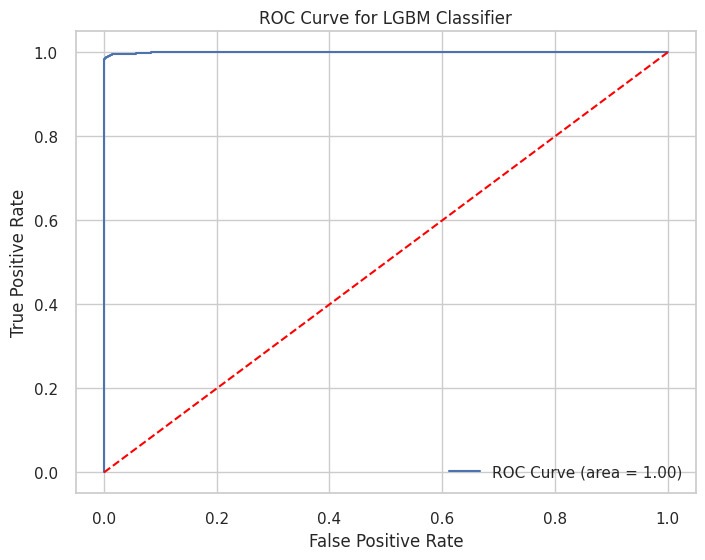

In [ ]:
train_and_evaluate_model(LGBMClassifier(), "LGBM Classifier")

Learning rate set to 0.020884
0:	learn: 0.6694423	total: 5.03ms	remaining: 5.02s
1:	learn: 0.6464589	total: 9.58ms	remaining: 4.78s
2:	learn: 0.6272274	total: 14.3ms	remaining: 4.76s
3:	learn: 0.6097914	total: 19ms	remaining: 4.73s
4:	learn: 0.5935292	total: 24.4ms	remaining: 4.86s
5:	learn: 0.5770980	total: 28.5ms	remaining: 4.73s
6:	learn: 0.5606439	total: 32.9ms	remaining: 4.67s
7:	learn: 0.5414551	total: 37.1ms	remaining: 4.6s
8:	learn: 0.5265102	total: 41.6ms	remaining: 4.58s
9:	learn: 0.5129074	total: 45.5ms	remaining: 4.5s
10:	learn: 0.4974068	total: 50.3ms	remaining: 4.52s
11:	learn: 0.4811288	total: 55.2ms	remaining: 4.54s
12:	learn: 0.4684847	total: 59.8ms	remaining: 4.54s
13:	learn: 0.4568140	total: 65.4ms	remaining: 4.61s
14:	learn: 0.4466004	total: 70.3ms	remaining: 4.61s
15:	learn: 0.4347958	total: 74.8ms	remaining: 4.6s
16:	learn: 0.4228831	total: 79.4ms	remaining: 4.59s
17:	learn: 0.4108266	total: 84.1ms	remaining: 4.59s
18:	learn: 0.4011109	total: 88.6ms	remaining: 4.5

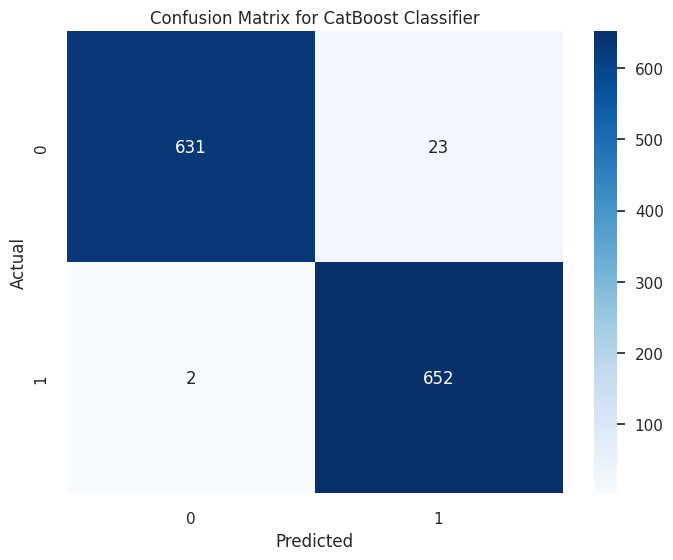

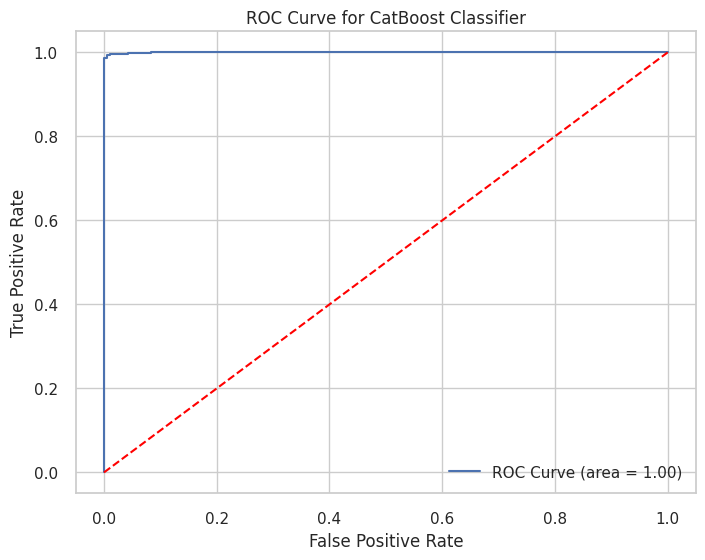

In [ ]:
train_and_evaluate_model(CatBoostClassifier(), "CatBoost Classifier")

Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       654
           1       0.98      0.99      0.99       654

    accuracy                           0.99      1308
   macro avg       0.99      0.99      0.99      1308
weighted avg       0.99      0.99      0.99      1308

--------------------------------------------------


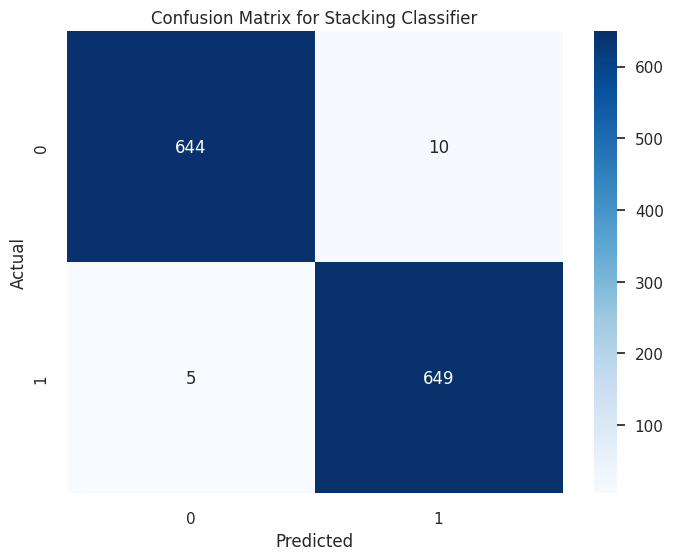

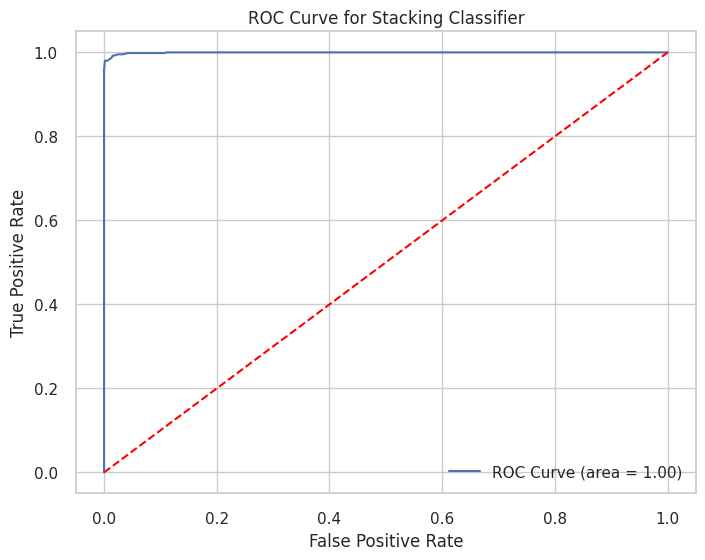

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
train_and_evaluate_model(stack_model, "Stacking Classifier")

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       654
           1       0.95      0.98      0.97       654

    accuracy                           0.96      1308
   macro avg       0.97      0.96      0.96      1308
weighted avg       0.97      0.96      0.96      1308

--------------------------------------------------


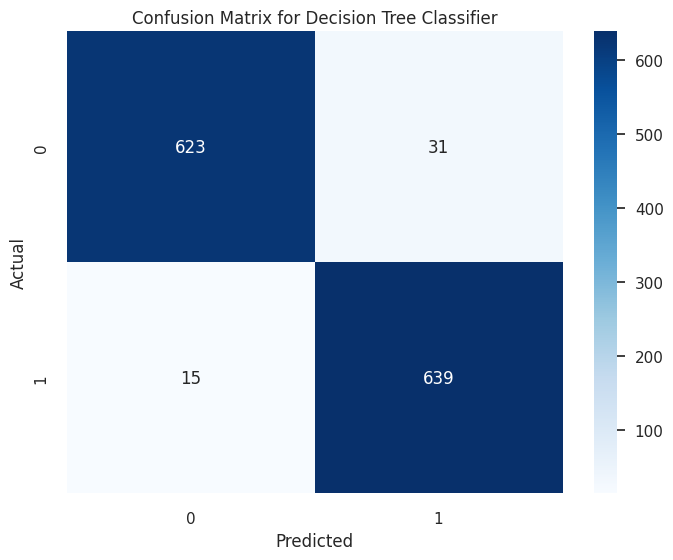

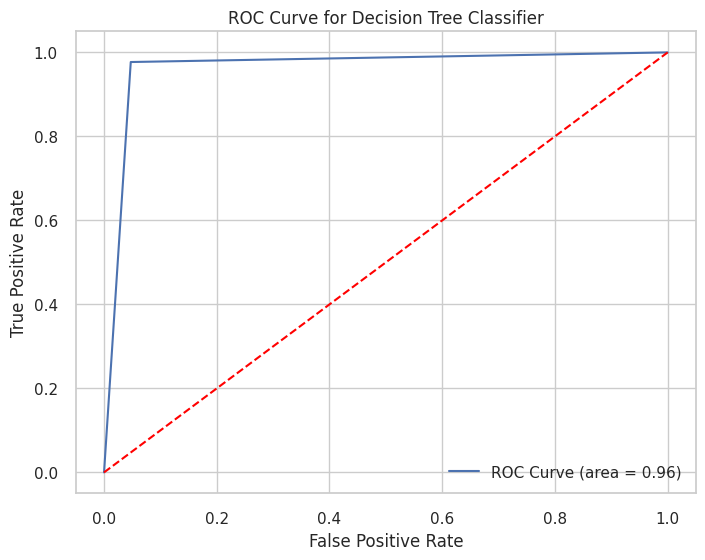

In [ ]:
train_and_evaluate_model(DecisionTreeClassifier(), "Decision Tree Classifier")

In [ ]:
model_perfs = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1': f1_scores,
    'ROC-AUC': roc_auc_scores
}).sort_values('Accuracy', ascending=False).reset_index(drop=True)

print(model_perfs)


                       Model  Accuracy  Precision    Recall        F1  \
0   Random Forest Classifier  0.991590   0.991619  0.991590  0.991590   
1   Random Forest Classifier  0.989297   0.989315  0.989297  0.989297   
2        LightGBM Classifier  0.989297   0.989370  0.989297  0.989296   
3        Stacking Classifier  0.988532   0.988561  0.988532  0.988532   
4        CatBoost Classifier  0.983180   0.983402  0.983180  0.983179   
5            LGBM Classifier  0.983180   0.983470  0.983180  0.983178   
6         XGBoost Classifier  0.982416   0.982742  0.982416  0.982413   
7         XGBoost Classifier  0.982416   0.982742  0.982416  0.982413   
8        CatBoost Classifier  0.980887   0.981383  0.980887  0.980882   
9   Decision Tree Classifier  0.964832   0.965568  0.964832  0.964818   
10  Decision Tree Classifier  0.964832   0.965110  0.964832  0.964827   
11    K-Neighbors Classifier  0.960245   0.963173  0.960245  0.960182   
12    K-Neighbors Classifier  0.957951   0.961213  

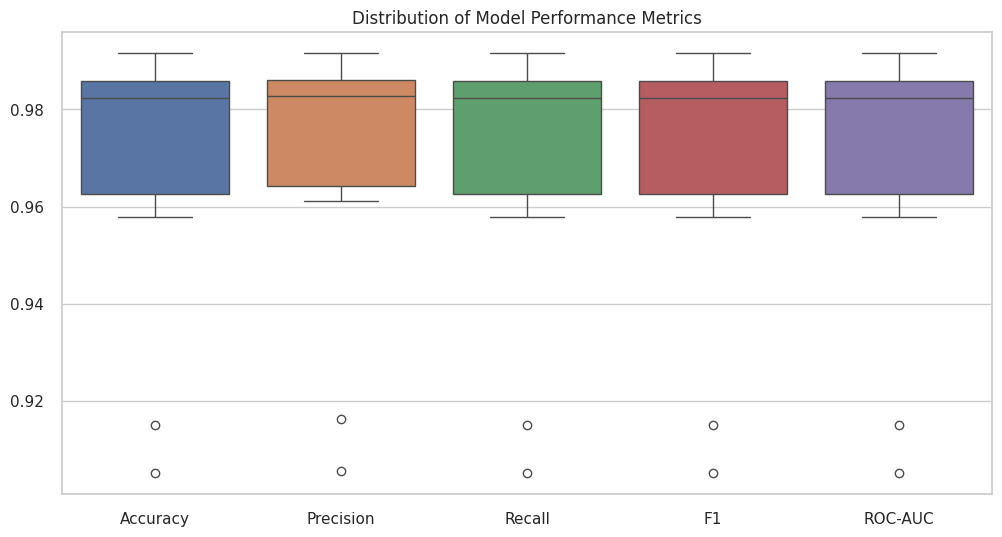

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=model_perfs.drop('Model', axis=1))
plt.title('Distribution of Model Performance Metrics')
plt.show()


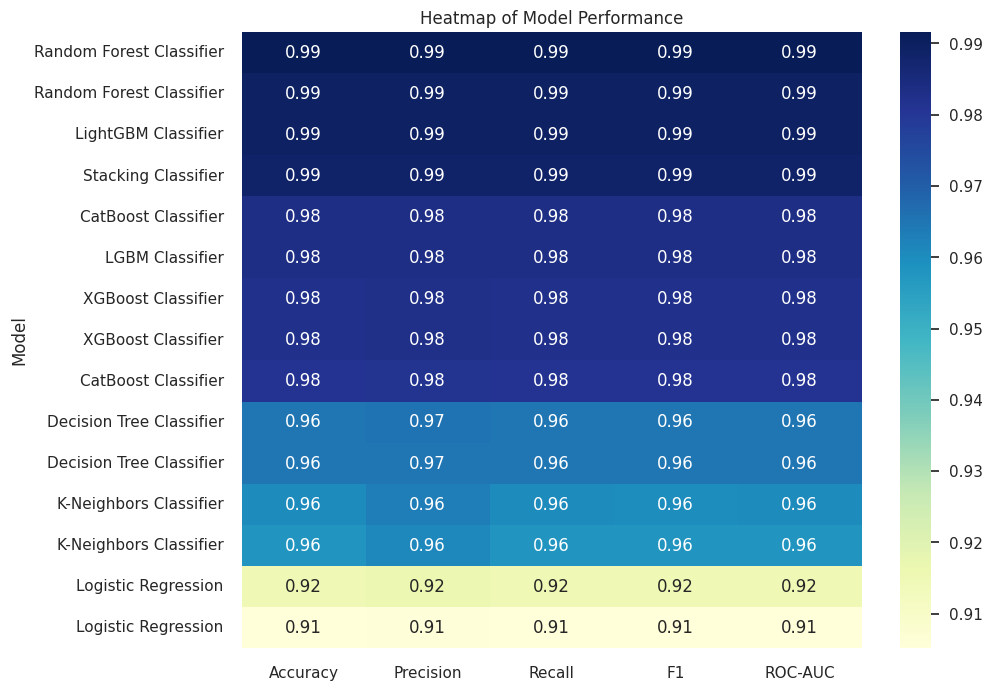

In [ ]:
# Converting metrics to a format suitable for heatmap
heatmap_data = model_perfs.set_index('Model')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Model Performance')
plt.show()


Evaluation

Final Assessment with the test set


In [ ]:
# Preprocessing steps
pipeline = Pipeline(steps=[
    ('constant', DropConstantFeatures()),
    ('correlated', DropCorrelatedFeatures()),
    ('duplicate', DropDuplicateFeatures())
])
X = pipeline.fit_transform(X)

# Handling imbalanced dataset with SMOTE
smote = BorderlineSMOTE()
X, y = smote.fit_resample(X, y)

# Splitting data into training and test sets
train_size = 0.80  # Adjust as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42, stratify=y)

# Scaling features
scaler = StandardScaler()  # or RobustScaler()
scaled_train_X = scaler.fit_transform(X_train)
scaled_test_X = scaler.transform(X_test)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=27, random_state=7)  # Adjust the number of components as needed
train_pca = pca.fit_transform(scaled_train_X)
test_pca = pca.transform(scaled_test_X)

# Training the model (example with XGBoost Classifier)
model = XGBClassifier()
model.fit(train_pca, y_train)

# Evaluating the model on the test set
predictions = model.predict(test_pca)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       654
           1       0.97      1.00      0.98       654

    accuracy                           0.98      1308
   macro avg       0.98      0.98      0.98      1308
weighted avg       0.98      0.98      0.98      1308

[[635  19]
 [  2 652]]
